# In-class assignment 25/09/2025
## __ASSOCIATION RULE MINING USING GROCERIES AND STUDENTS DATASETS__


In [2]:
!pip install pandas numpy matplotlib seaborn wordcloud

  Using cached pandas-2.3.2-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-win_amd64.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached pandas-2.3.2-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
# Loading the groceries dataset
groceries = pd.read_csv("Groceries_dataset.csv")
groceries #Viewing as a dataframe

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [15]:
#Making sure the data types are consistent
groceries.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [17]:
#Changing data types
groceries['Date'] = pd.to_datetime(groceries['Date'], errors='coerce')
groceries['Member_number'] = groceries['Member_number'].astype(str)

In [18]:
#Making sure the data types are consistent
groceries.dtypes

Member_number              object
Date               datetime64[ns]
itemDescription            object
dtype: object

In [19]:
#Displaying the columns
groceries.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [24]:
#Let's subset the dataframe to only respond to the question at hand
subset = groceries[["Date", "itemDescription"]]
subset


,Date,itemDescription
0,2015-07-21,tropical fruit
1,2015-01-05,whole milk
2,2015-09-19,pip fruit
3,2015-12-12,other vegetables
4,2015-02-01,whole milk
...,...,...
38760,2014-10-08,sliced cheese
38761,2014-02-23,candy
38762,2014-04-16,cake bar
38763,2014-12-03,fruit/vegetable juice


In [25]:
# Number of products sold
groceries['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Products Sold')]

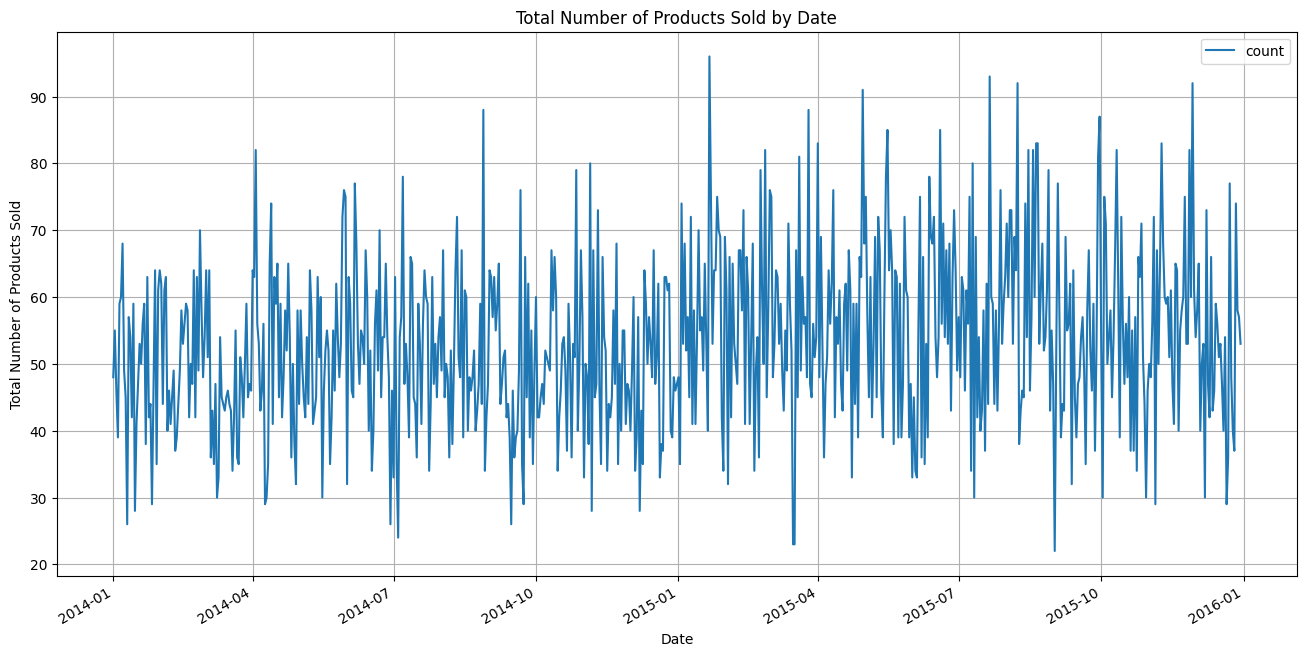

In [26]:
# Grouping by
groceries.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(16,8), 
grid=True, title="Total Number of Products Sold by Date").set(xlabel="Date", ylabel="Total Number of Products Sold")

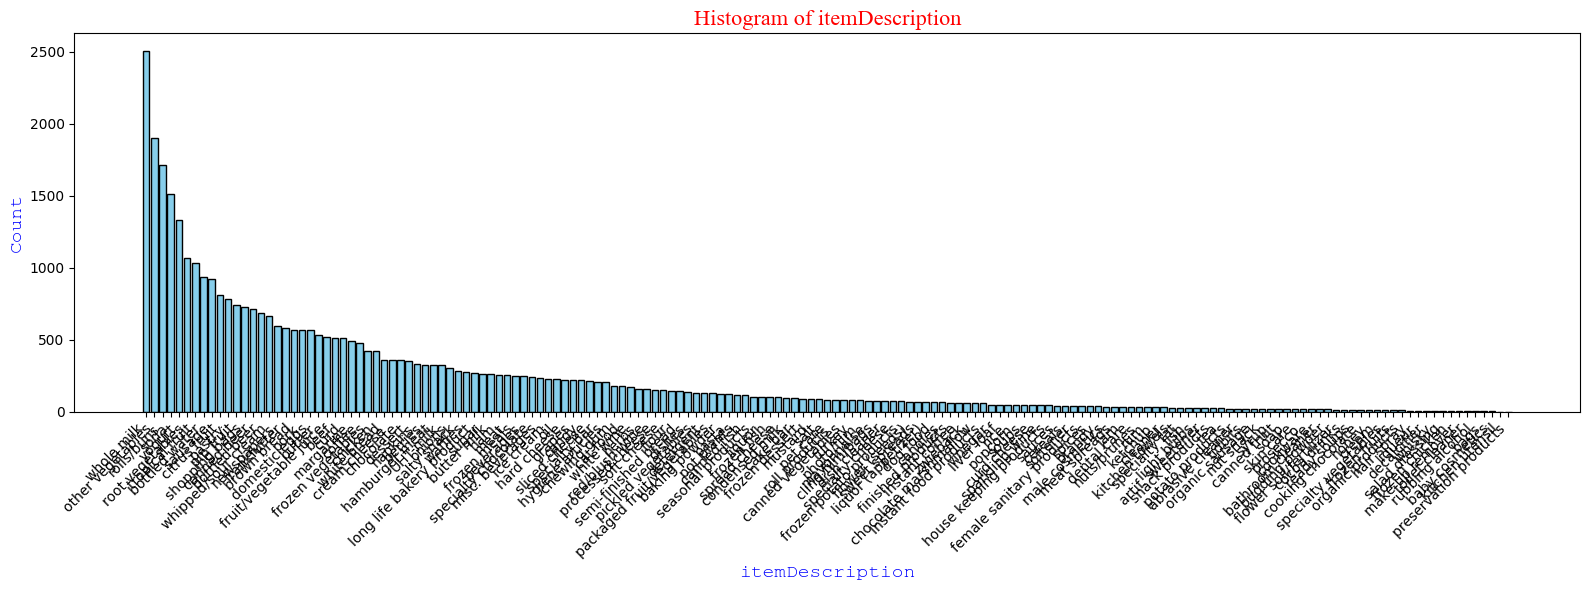

In [34]:
def hist_plot(df, col):
    # Count values
    counts = df[col].value_counts()
    
    plt.figure(figsize=(16,6))  # wider figure
    plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    
    plt.xlabel(col, fontdict={'family': 'Courier New', 'color': 'blue', 'size': 14})
    plt.ylabel("Count", fontdict={'family': 'Courier New', 'color': 'blue', 'size': 14})
    plt.title(f"Histogram of {col}", fontdict={'family': 'Times New Roman', 'color': 'red', 'size': 16})
    
    # Rotate x-axis labels and align right for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plt.tight_layout()  # automatically adjust margins
    plt.show()

# Use the function to plot histogram of product count
hist_plot(subset, 'itemDescription')


In [35]:
#Generating lists of transactions per day
transactions = [a[1]['itemDescription'].tolist() for a in list(groceries.groupby(['Date']))]
transactions

[['cleaner',
  'sausage',
  'tropical fruit',
  'whole milk',
  'citrus fruit',
  'onions',
  'other vegetables',
  'berries',
  'hamburger meat',
  'hamburger meat',
  'other vegetables',
  'hamburger meat',
  'bottled water',
  'butter',
  'yogurt',
  'yogurt',
  'waffles',
  'soda',
  'sliced cheese',
  'curd',
  'specialty chocolate',
  'shopping bags',
  'bottled water',
  'other vegetables',
  'flower (seeds)',
  'coffee',
  'whipped/sour cream',
  'yogurt',
  'whipped/sour cream',
  'frozen potato products',
  'candles',
  'yogurt',
  'bottled beer',
  'Instant food products',
  'frozen vegetables',
  'shopping bags',
  'frozen vegetables',
  'whole milk',
  'brown bread',
  'bottled water',
  'soda',
  'frozen vegetables',
  'Instant food products',
  'domestic eggs',
  'waffles',
  'dishes',
  'chocolate',
  'bottled water'],
 ['beef',
  'frankfurter',
  'hamburger meat',
  'soda',
  'UHT-milk',
  'root vegetables',
  'rolls/buns',
  'rolls/buns',
  'long life bakery product',

In [ ]:
cassava_binary = cassava.drop("Season", axis=1).applymap(lambda x: 1 if str(x).lower() in ["yes", "1", "true"] else 0)

In [37]:
!pip install mlxtend --quiet

In [39]:
# Convert to transaction-item matrix
basket = subset.groupby(['Date', 'itemDescription'])['itemDescription'] \
               .count().unstack().fillna(0)

# Make it binary (0/1)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_12396\1780766909.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [41]:
# Support
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

c:\Users\hp\Desktop\Lorraine's\Big Data Mining and Analytics 3.1\ASS_2\ass_2\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(UHT-milk),(bottled beer),0.219780,0.601504,1.040130
1,(bottled beer),(UHT-milk),0.219780,0.380048,1.040130
2,(brown bread),(UHT-milk),0.204670,0.375315,1.027178
3,(UHT-milk),(brown bread),0.204670,0.560150,1.027178
4,(citrus fruit),(UHT-milk),0.250000,0.391398,1.071194
...,...,...,...,...,...
338218,(whole milk),"(rolls/buns, sausage, tropical fruit, other ve...",0.208791,0.218077,1.004813
338219,(rolls/buns),"(whole milk, sausage, tropical fruit, other ve...",0.208791,0.234206,1.002955
338220,(sausage),"(whole milk, rolls/buns, tropical fruit, other...",0.208791,0.331878,1.093244
338221,(tropical fruit),"(whole milk, rolls/buns, sausage, other vegeta...",0.208791,0.287879,1.069264


# Plot Support, Confidence, Lift

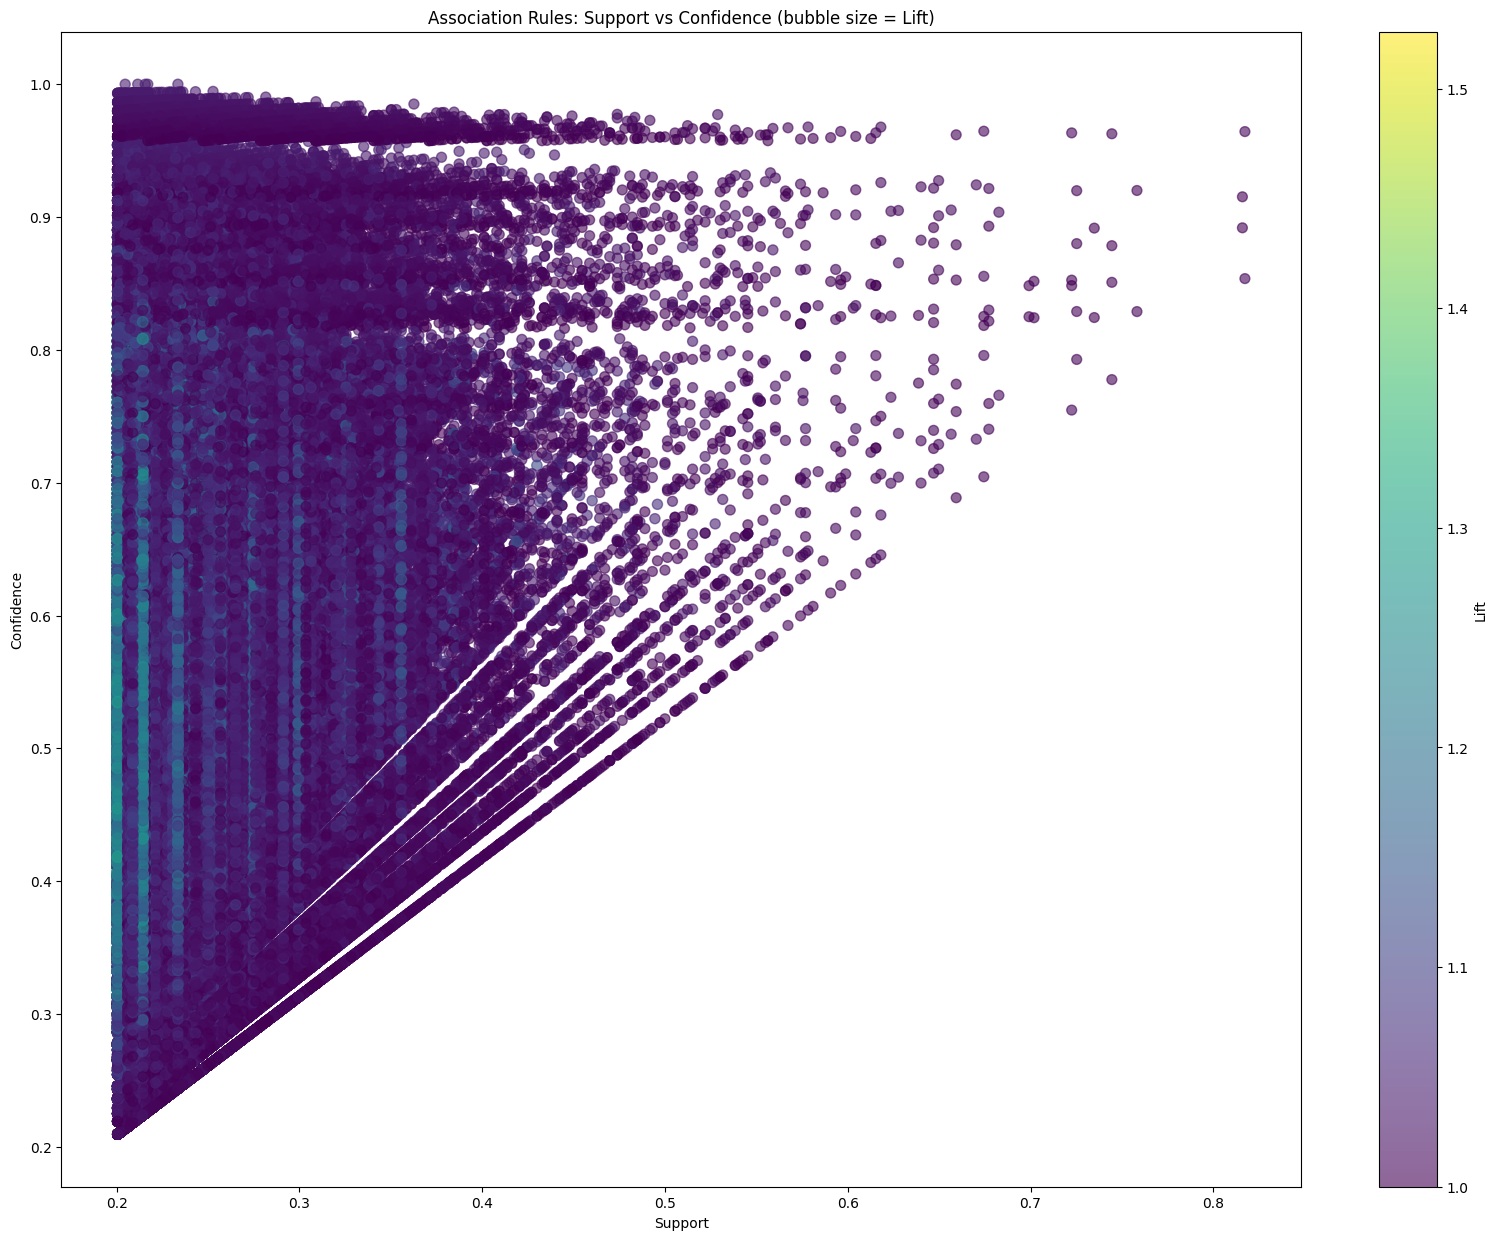

In [43]:
plt.figure(figsize=(20,15))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*50, alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (bubble size = Lift)')
plt.show()